## **Problem Statement :**
## According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
## This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## **Attribute Information :**
## 1) id: unique identifier
## 2) gender: "Male", "Female" or "Other"
## 3) age: age of the patient
## 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
## 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
## 6) ever_married: "No" or "Yes"
## 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
## 8) Residence_type: "Rural" or "Urban"
## 9) avg_glucose_level: average glucose level in blood
## 10) bmi: body mass index
## 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
## 12) stroke: 1 if the patient had a stroke or 0 if not
## *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

![fishy](DataScienceProjects/Brain Stroke/Brain-Stroke-1.webp)
# **What is Brain Stroke??**
## A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications
# **Symptoms**
## If you or someone you're with may be having a stroke, pay particular attention to the time the symptoms began. Some treatment options are most effective when given soon after a stroke begins.

## **Signs and symptoms of stroke include:**
## <ul>
##  <li> Trouble speaking and understanding what others are saying. You may experience confusion, slur your words or have difficulty understanding speech.
##  <li> Paralysis or numbness of the face, arm or leg. You may develop sudden numbness, weakness or paralysis in your face, arm or leg.
##  <li> This often affects just one side of your body. Try to raise both your arms over your head at the same time. If one arm begins to fall, you may be having a stroke.Also, one side of your mouth may droop when you try to smile.
##  <li> Problems seeing in one or both eyes. You may suddenly have blurred or blackened vision in one or both eyes, or you may see double.
##  <li>Headache. A sudden, severe headache, which may be accompanied by vomiting, dizziness or altered consciousness, may indicate that you're having a stroke.
##  <li> Trouble walking. You may stumble or lose your balance. You may also have sudden dizziness or a loss of coordination.
## <ul>



In [1]:
#pandas
import pandas as pd 

#numpy
import numpy as np 

#matplotlib
import matplotlib.pyplot as plt 

#seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")

#sklearn
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


## Read Data From CSV.

In [2]:
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Identify Categorical and Numerical Fetures**

In [3]:
categorical_vars = list()
numerical_vars = list()

for i in stroke_df.columns:
    if stroke_df[i].dtype =='object':
        categorical_vars.append(i)
    else:
        numerical_vars.append(i)


### **Categorical Variables**

In [4]:
print(categorical_vars)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


### **Numerical Variables**

In [5]:
print(numerical_vars)

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


## If you observe we dont requiredd id column for our prediction.So we drop it.

In [6]:
stroke_df.drop('id',axis=1,inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Check for NULL Values**

In [7]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## **Inference :**
## In our dataset there is no null values present except bmi column.

In [8]:
print("Total Rows In BMI column :",len(stroke_df.bmi))
print("Total null values present in bmi column :",stroke_df.bmi.isnull().sum())

Total Rows In BMI column : 5110
Total null values present in bmi column : 201


# **Handling Missing Values**
## There are many ways to handle missing values.
## One could be delete rows in which we have null values present.
## But because of this we can can loss lot of information
## Another way is replace null vvalues with mean/median.
## The secod method is effective when dataset is numeric and continous & good news is our bmi column fit perfectly in this condition.
## So we use second method.

In [9]:
stroke_df['bmi'] = stroke_df.bmi.replace(np.NAN,stroke_df.bmi.mean())

In [10]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **EDA**

In [11]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## **Count Plot for Stroke Feature**

## **1**:Patient had stroke.
## **0**:Patient had no stroke.

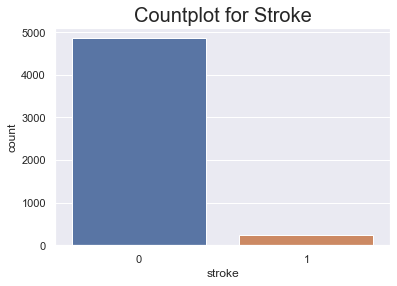

In [12]:
sns.countplot(x='stroke',data=stroke_df)
plt.title("Countplot for Stroke",{'fontsize':20});

In [13]:
print("Total Observations :",stroke_df.shape[0])
print("Patients does not have stroke :",stroke_df.stroke.value_counts()[0])
print("Patients have stroke :",stroke_df.stroke.value_counts()[1])
print("Event Rate :",(stroke_df.stroke.value_counts()[1] / stroke_df.shape[0])*100)

Total Observations : 5110
Patients does not have stroke : 4861
Patients have stroke : 249
Event Rate : 4.87279843444227


## **Inference :**
## Based on distribution of stroke feature we can say that dataset is imbalance.
## We have more records of patients had no stroke as compare to patients had stroke.
## Lets handle the imbalance data later.

<AxesSubplot:xlabel='work_type', ylabel='count'>

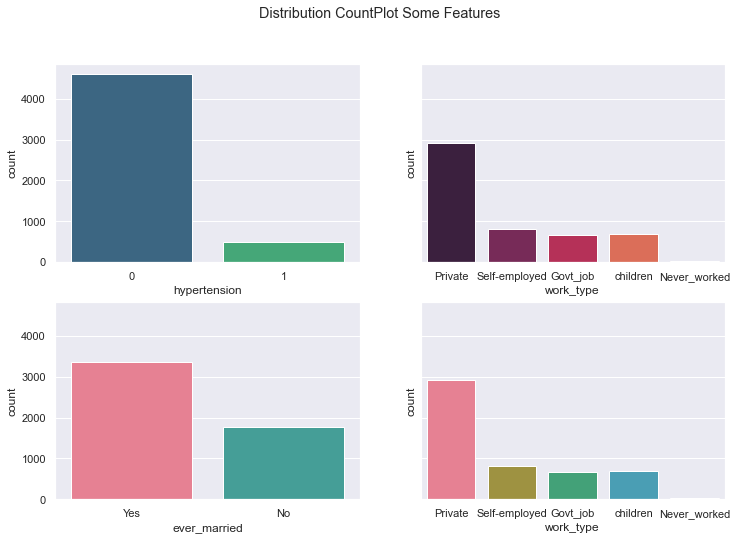

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.suptitle('Distribution CountPlot Some Features')

sns.countplot(ax=axes[0][0], x=stroke_df['hypertension'],palette="viridis")

sns.countplot(ax=axes[0][1], x=stroke_df['work_type'],palette="rocket");

sns.countplot(ax=axes[1][0], x=stroke_df['ever_married'],palette="husl");

sns.countplot(ax=axes[1][1], x=stroke_df['work_type'],palette="husl");


## **Distribution based on Stroke Patients**

In [15]:
stroke_df.work_type[stroke_df.stroke == 1].value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

In [16]:
stroke_df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

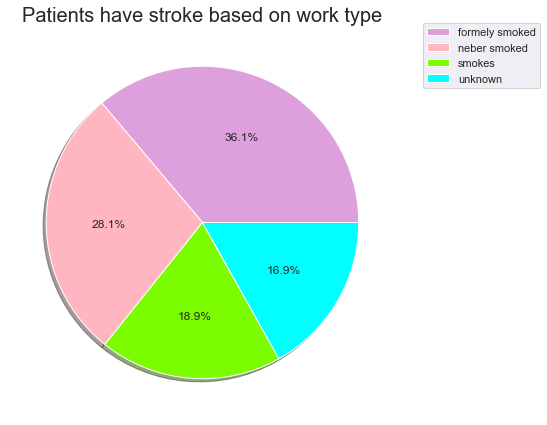

In [17]:
plt.figure(figsize=(7,8))
labels = [ "formely smoked" , "neber smoked","smokes","unknown"]
plt.pie(x=stroke_df.smoking_status[stroke_df.stroke == 1].value_counts(),
        # explode = (0, 0, 0, 0.2),
        autopct='%1.1f%%',
        shadow=True, colors=['plum','lightpink','lawngreen','cyan']);
plt.legend(labels,bbox_to_anchor=(1.05,1.025), loc="upper left");
plt.title("Patients have stroke based on work type",{'fontsize':20});

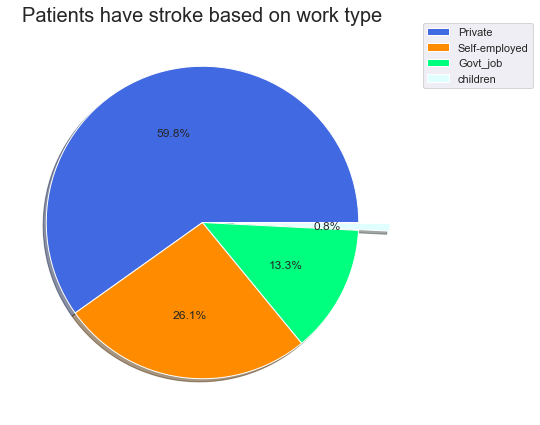

In [18]:
plt.figure(figsize=(7,8))
labels = [ "Private" , "Self-employed","Govt_job","children"]
plt.pie(x=stroke_df.work_type[stroke_df.stroke == 1].value_counts(),
        explode = (0, 0, 0, 0.2),
        autopct='%1.1f%%',
        shadow=True, colors=['royalblue','darkorange','springgreen','lightcyan','lavender']);
plt.legend(labels,bbox_to_anchor=(1.05,1.025), loc="upper left");
plt.title("Patients have stroke based on work type",{'fontsize':20});

## **Inference :**
## Based on distribution the people whos work type is private having stroke as compared to gov job.

In [19]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [20]:
X = stroke_df.drop('stroke',axis=1)
y = stroke_df.stroke

In [21]:
X.age = round(X.age)

In [22]:
encoder = LabelEncoder()

In [23]:
objList = X.select_dtypes(include = "object").columns
for feat in objList:
    X[feat] = encoder.fit_transform(X[feat])

# **Handling Imbalance Data**

## SMOTE algorithm works in 4 simple steps:
## <ul>
## <li>Choose a minority class as the input vector
## <li>Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
## <li>Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
## <li> Repeat the steps until data is balanced
## </ul>

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, y)

In [25]:
print('Original dataset shape', X.shape)
print('Resample dataset shape', x_smote.shape)

Original dataset shape (5110, 10)
Resample dataset shape (9722, 10)


# **Spliting Data**
## To get a good prediction, divide the data into training and testing data, it is because as the name suggests you will train few data points and test few data points, and keep on doing that unless you get good results.

In [26]:
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.28)

# **Models**

## Feature Scaling 

In [27]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

## **Logistic Regression**

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
log_reg.score(X_test_scaled,y_test)

0.8005875872199779

## **Random Forest**

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf.score(X_test_scaled,y_test)

0.9309585016525891

## **Clasification Report**

In [30]:
rf_pred = rf.predict(X_test_scaled)
log_pred = log_reg.predict(X_test_scaled)

print("Classifiaction Report for Random Forest")
print(classification_report(y_test,rf_pred))
print("******************************************************")
print("Classification Report for Logistic Regression")
print(classification_report(y_test,log_pred))

Classifiaction Report for Random Forest
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1415
           1       0.91      0.95      0.93      1308

    accuracy                           0.93      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.93      0.93      0.93      2723

******************************************************
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1415
           1       0.77      0.84      0.80      1308

    accuracy                           0.80      2723
   macro avg       0.80      0.80      0.80      2723
weighted avg       0.80      0.80      0.80      2723



## **Confusion Metrices**

## **Random Forest**

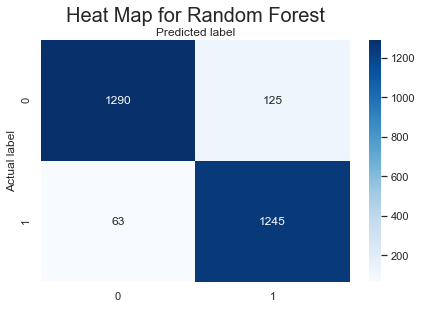

In [31]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

cnf_matrix = confusion_matrix(y_test,rf_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues",
            fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Heat Map for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## **Logistic Regression**

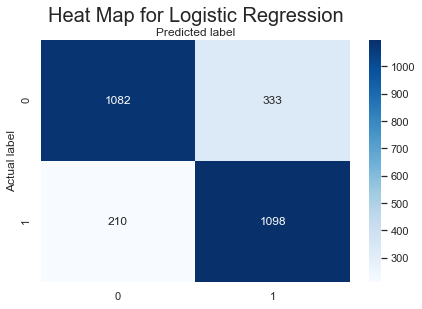

In [32]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

cnf_matrix = confusion_matrix(y_test,log_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues',
            fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Heat Map for Logistic Regression', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## **Roc-Auc Curves**

In [33]:
pred_prob1 = log_reg.predict_proba(X_test_scaled)
pred_prob2 = rf.predict_proba(X_test_scaled)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [34]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.884946131984742 0.9798675722112361


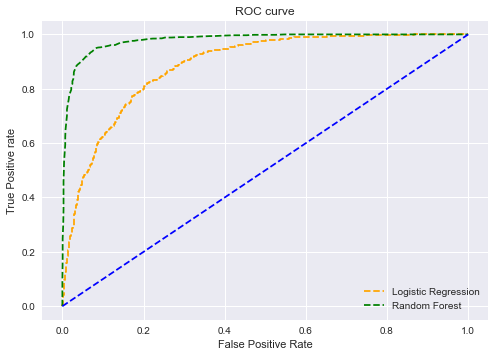

In [35]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## **Inference :**
## After plotting AUC-ROC curve we can observe Random Forest curve is higher than that for the Logistic Regression ROC curve. Therefore, we can say that Random Forest did a better job of classifying the positive class in the dataset.

# F1 Score
## The F1 Score is the 2*((precision*recall)/(precision+recall))

## **Logistic Regression**

In [36]:
print(f1_score(y_test,log_pred))

0.8017524644030669


## **Random Forest**

In [37]:
print(f1_score(y_test,rf_pred))

0.929798356982823


## **Feature Importance For Random Forest Model**

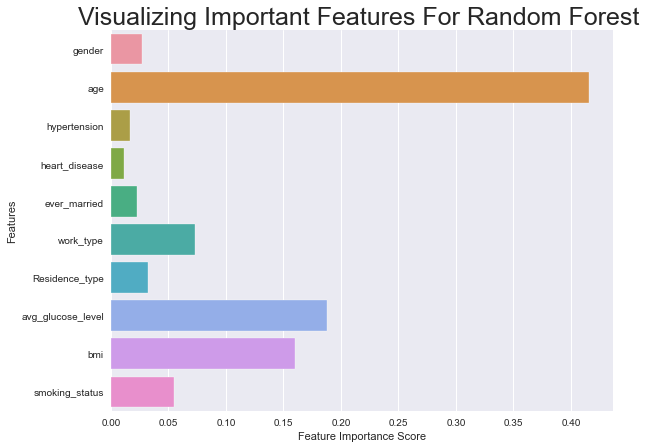

In [38]:
plt.figure(figsize=(9,7))
feature_imp1 = rf.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features For Random Forest ",{'fontsize':25})
plt.show();
feature_dict = {k:v for (k,v) in zip(X.columns,feature_imp1)}

# **Save Model**

In [39]:
import pickle
with open('stroke.sav','wb') as f:
    pickle.dump(rf,f)

## **Inference :**
## Feature importance hepls to understand how model is work.
## In this case we can see that Age,Average Glucoge and BMI are the most important features for our model.
## Age is most signifiacant feature for our model.

# **Conclusion :**

## We start with reading data and then categorised categorical features and numerical features.After that we deal with missing values in **BMI** feature.
## Then we perform EDA on features.We conclude that we have imbalance data ie negative class examples is greater that positive class.
## After visulization we handle imbalance data.
## After that we move to most important part model building. Before starting to train model we split our data into train data(testing purpose) and test data(validation purpose) and perform **feature scaling**.
## Random Forest and Logistic Regression models were tried.
## To check which model perform best plot roc-auc curves along with **classifiaction report** and **confusion matrices**.
## While **Random Forest**  win the race.
## **I therefore selected the Random Forest as my model.**